# Amazon Forecast Data Diagnostic

> *This notebook should work well in the `Python 3 (Data Science)` kernel in SageMaker Studio, or `conda_python3` in SageMaker Notebook Instances*

This notebook provides a utility you can use to check your prepared data (CSV) files before loading to Amazon Forecast.

It's a work in progress so won't cover everything, but may help to understand the condition of your data and whether any additional refinement needs to be done.

In [1]:
%load_ext autoreload
%autoreload 2

# Python Built-Ins:
import os
import sys

# External Dependencies:
import boto3

# Local Dependencies:
import util

In [2]:
help(util.diagnostic.diagnose)

Help on function diagnose in module util.diagnostic:

diagnose(tts_path:str, frequency:Union[str, NoneType]=None, domain:Union[str, NoneType]=None, tts_schema=None) -> None
    Perform a variety of analyses and checks on prepared data for Amazon Forecast, displaying to notebook
    
    Parameters
    ----------
    tts_path :
        Local path to target time-series data CSV or folder of CSVs.
    frequency : (Optional, recommended)
        The 'ForecastFrequency' string per Forecast's CreatePredictor API. If this parameter is omitted, the
        diagnostic cannot analyze the time range extents spanned and contiguous ranges covered for items:
        Decreasing RAM requirement but also usefulness!
    domain : (Optional)
        'Domain' for the dataset group as configured in Amazon Forecast per
        https://docs.aws.amazon.com/forecast/latest/dg/howitworks-domains-ds-types.html (May be omitted and
        inferred automatically if possible from column headers / provided schemas).

Analysis started at 2020-09-29 03:44:33.954182+00:00
Found 1 target time-series files:
    data/target_time_series_2014.csv
Processing file chunk 0 (global chunk 0)
Inferred target time-series schema:
{
  "Attributes": [
    {
      "AttributeName": "timestamp",
      "AttributeType": "timestamp"
    },
    {
      "AttributeName": "demand",
      "AttributeType": "float"
    },
    {
      "AttributeName": "item_id",
      "AttributeType": "string"
    }
  ]
}
Validated schema conforms to domain 'INVENTORY_PLANNING' with:
Required fields ['item_id', 'timestamp', 'demand']
Optional fields []
Custom fields []


### Target Time-Series Summary
- **Time span:** 2014-01-01 00:00:00 to 2014-12-31 23:00:00 (365 timesteps)
- **Total records:** 9098 of which 4836 with no missing values

,Missing/Empty Values
timestamp,0
demand,4262
item_id,0


### Items
- **Unique items to forecast:** 2

**Top items by record count:**

,Records,Percentage
item_id,,
B,5571,61.23%
A,3527,38.77%


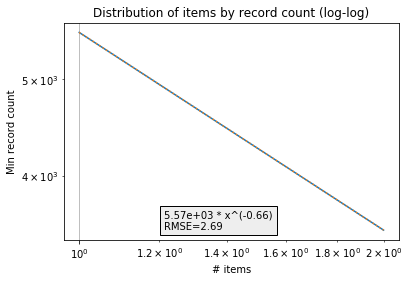

**Unique values in dimension 'item_id'**: 2

**Top record counts by dimension item_id:**

,Records,Percentage
B,5571,61.23%
A,3527,38.77%


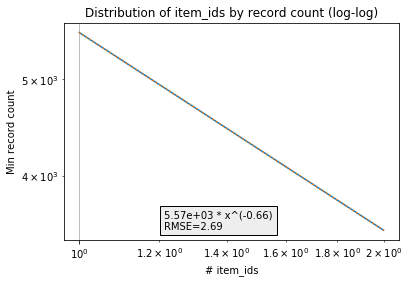

### Data Ranges

- **Forecast frequency:** 'D'
- **Total detected contiguous data ranges:** 14 (avg 7.00 per item)

#### Overall extents (including gaps between records)

On average, each item spans 219.5 time steps (219.0 min, 220.0 max)

Ignoring/filling gaps, items span proportion of the total history as follows:
- **≥100.0% of global history:** 0
- **100.0%> x ≥90.0% of global history:** 0 (0.0% of all items)
- **90.0%> x ≥50.0% of global history:** 2 (100.0% of all items)
- **50.0%> x ≥5.0% of global history:** 0 (0.0% of all items)
- **5.0%> x ≥1.0% of global history:** 0 (0.0% of all items)
- **<1.0% of global history:** 0 (0.0% of all items)

**Top items by total extent:**

,starts,ends,range,steps
item_id,,,,
B,2014-01-01,2014-08-08,<220 * Days>,220.0
A,2014-01-01,2014-08-07,<219 * Days>,219.0


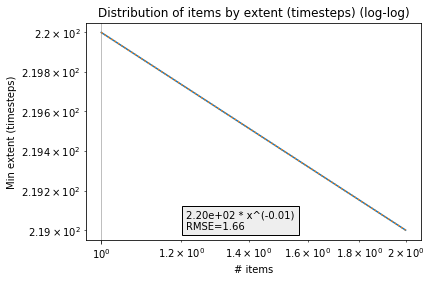

#### Contiguous ranges (split by gaps)

Items contiguously cover proportion of their overall extents as follows:
- **≥100.0% of extent:** 0
- **100.0%> x ≥90.0% of extent:** 2 (100.0% of all items)
- **90.0%> x ≥50.0% of extent:** 0 (0.0% of all items)
- **50.0%> x ≥10.0% of extent:** 0 (0.0% of all items)
- **10.0%> x ≥1.0% of extent:** 0 (0.0% of all items)
- **<1.0% of global history:** 0 (0.0% of all items)

**Top items by timesteps covered:**

,# Contiguous Ranges,Min Range Length,Mean Range Length,Max Range Length,Timesteps Covered,Extent Timesteps
item_id,,,,,,
A,5,3.0,42.200000,119.0,211.0,219.0
B,9,1.0,22.666667,119.0,204.0,220.0


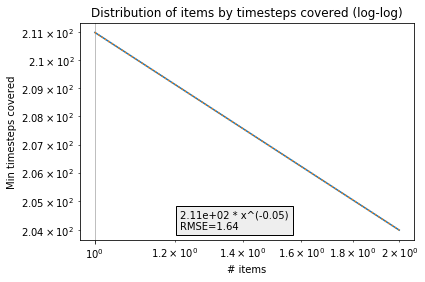

In [3]:
util.diagnostic.diagnose(
    "data/target_time_series_2014.csv",
    domain="INVENTORY_PLANNING",
    frequency="D",
#     tts_schema={
#         "Attributes": [
#             {
#                 "AttributeName": "timestamp",
#                 "AttributeType": "timestamp",
#             },
#             {
#                 "AttributeName": "demand",
#                 "AttributeType": "float",
#             },
#             {
#                 "AttributeName": "item_id",
#                 "AttributeType": "string",
#             },
#         ],
#     },
)